### ShopFlow Solution
#### 100000 orders Monthly
● 22% of products are returned

● Each return costs $18 (shipping, restocking, processing)

● Monthly cost: ~$400,000

● No systematic prediction or intervention

#### Model Test:

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import joblib
from functions import preprocess

In [3]:
train = pd.read_csv('ecommerce_returns_train.csv')
test = pd.read_csv('ecommerce_returns_test.csv')


#### Preprocess data:

In [4]:
# Prepare data
X_train, y_train = preprocess(train)
X_test, y_test = preprocess(test)
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#### Model:

In [5]:
# Train baseline model
baseline_model = LogisticRegression(random_state=42, max_iter=1000)
baseline_model.fit(X_train_scaled, y_train)

# Predictions
y_pred = baseline_model.predict(X_test_scaled)

# Basic evaluation
print("Baseline Model Performance")
print("=" * 50)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Baseline Model Performance
Accuracy: 0.7475

Classification Report:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1495
           1       0.00      0.00      0.00       505

    accuracy                           0.75      2000
   macro avg       0.37      0.50      0.43      2000
weighted avg       0.56      0.75      0.64      2000



D:\Programas\Anaconda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programas\Anaconda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programas\Anaconda\envs\myenv\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [6]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Generar predicciones
y_train_pred = baseline_model.predict(X_train)
y_test_pred = baseline_model.predict(X_test)

# 2. Imprimir reporte numérico (Precisión, Recall, F1)
print("Resultados en TRAIN")
print("-" * 30)
print(classification_report(y_train, y_train_pred))


Resultados en TRAIN
------------------------------
              precision    recall  f1-score   support

           0       0.75      0.95      0.84      5979
           1       0.32      0.07      0.12      2021

    accuracy                           0.73      8000
   macro avg       0.54      0.51      0.48      8000
weighted avg       0.64      0.73      0.66      8000



D:\Programas\Anaconda\envs\myenv\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Programas\Anaconda\envs\myenv\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [7]:
print("\nResultados en TEST")
print("-" * 30)
print(classification_report(y_test, y_test_pred))


Resultados en TEST
------------------------------
              precision    recall  f1-score   support

           0       0.75      0.94      0.83      1495
           1       0.29      0.07      0.12       505

    accuracy                           0.72      2000
   macro avg       0.52      0.51      0.48      2000
weighted avg       0.63      0.72      0.65      2000



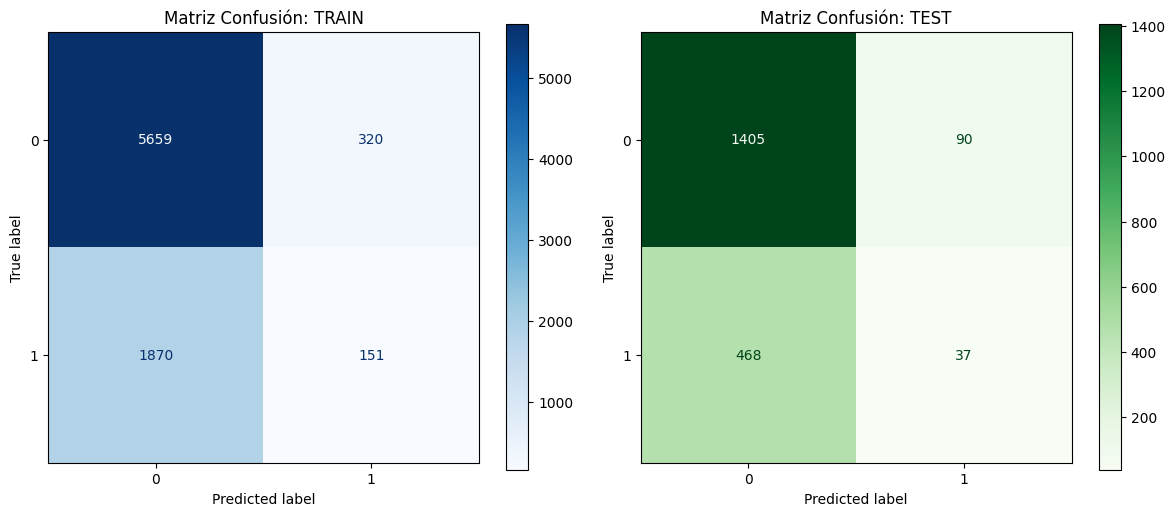

In [8]:
# Crear una figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Matriz TRAIN (Azul)
ConfusionMatrixDisplay.from_predictions(
    y_train, 
    y_train_pred, 
    ax=axes[0], 
    cmap='Blues',
    normalize=None # Cambia a 'true' si quieres ver porcentajes
)
axes[0].set_title('Matriz Confusión: TRAIN')

# Matriz TEST (Verde)
ConfusionMatrixDisplay.from_predictions(
    y_test, 
    y_test_pred, 
    ax=axes[1], 
    cmap='Greens',
    normalize=None 
)
axes[1].set_title('Matriz Confusión: TEST')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.metrics import confusion_matrix, classification_report

# 1. Generar predicciones
y_pred_train = baseline_model.predict(X_train)
y_pred_test = baseline_model.predict(X_test)

# 2. Calcular las matrices (Devuelve un array de numpy)
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

print("--- Matriz de Confusión (TRAIN) ---")
print(cm_train)
print("\n--- Matriz de Confusión (TEST) ---")
print(cm_test)

# Opcional: Si necesitas extraer los valores individuales (solo para clasificación binaria)
vn, fp, fn, vp = cm_test.ravel()
print(f"\nDesglose Test -> VN: {vn}, FP: {fp}, FN: {fn}, VP: {vp}")

--- Matriz de Confusión (TRAIN) ---
[[5659  320]
 [1870  151]]

--- Matriz de Confusión (TEST) ---
[[1405   90]
 [ 468   37]]

Desglose Test -> VN: 1405, FP: 90, FN: 468, VP: 37


D:\Programas\Anaconda\envs\myenv\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
D:\Programas\Anaconda\envs\myenv\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [18]:
(90+37)/(1405+90+468+37)

0.0635

In [16]:
(468+90)/(1405+90+468+37)

0.279

In [19]:
90/(90+1405)

0.06020066889632107

In [17]:
22000*0.279

6138.000000000001

In [ ]:
1613*3+20387*18+4696*3

### Findings:

##### 

* Regarding the algorithm's performance, this model is ineffective for our primary goal: detecting product returns (is_return = 1). The key metrics indicate that the model fails to capture the target class efficiently, with a Recall of only 7% (Train/Test) and Precision in  train and test around 30%.

* This highlights why it is crucial to evaluate Precision, Recall, and F1-Score alongside Accuracy. Accuracy alone often yields a misleadingly high score that does not reflect the model's true ability to handle imbalanced data.

* If the company were to deploy this model in production for a batch of 100K orders, the projected financial impact would be:"

<br>

###### Calculation over 100K orders.
###### 22% are returned.
###### True negative cost is 0.
###### False Positive cost is 3
###### False Negative cost is  18 
###### True Positive cost is 3. 

<br>

###### Scenario without model over 100K orders with 22% returned :
###### 22 K * 18 =  396 000 USD

<br>

###### Scenario with model over 100K orders with 22% returned :
###### TP rate is over 7.33%
###### Over 22K we got that 1613 will cost us 3 USD and 20387 will cost 18

<br>


###### False  Positive is 6%
###### 4696 units are gonna cost us 3 USD
###### True Negative 73K will cost us 0 USD.

<br>

###### Total :  385 893 USD + production model cost
###### Savings 10 107 USD ( assuming production cost is 0)



#### Alternative Model:

In [1]:
from functions import calcular_impacto_financiero
from functions import preprocess
import pandas as pd
import numpy as np 
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

train = pd.read_csv('ecommerce_returns_train.csv')
test = pd.read_csv('ecommerce_returns_test.csv')

# 1. Preparar datos
X_train, y_train = preprocess(train)
X_test, y_test = preprocess(test)

# Calcular el radio de desbalance para ayudar al XGBoost
# (Cant. Negativos / Cant. Positivos)
ratio = float(np.sum(y_train == 0)) / np.sum(y_train == 1)

# 2. Entrenar XGBoost
# scale_pos_weight: Fundamental. Le dice al modelo que las devoluciones importan 'ratio' veces más.
model_xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    scale_pos_weight=ratio, 
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

model_xgb.fit(X_train, y_train)

# 3. Predecir
y_pred_xgb = model_xgb.predict(X_test)

# 4. Evaluación Técnica
print("XGBoost Model Performance")
print("=" * 50)
print(classification_report(y_test, y_pred_xgb))
# 5. Evaluación Financiera
calcular_impacto_financiero(y_test, y_pred_xgb)

XGBoost Model Performance
              precision    recall  f1-score   support

           0       0.79      0.61      0.69      1495
           1       0.31      0.51      0.38       505

    accuracy                           0.58      2000
   macro avg       0.55      0.56      0.53      2000
weighted avg       0.67      0.58      0.61      2000


ANÁLISIS FINANCIERO (Proyección 100k envíos / 22% Retornos)
Métricas del Modelo en Test:
 -> Recall (Capacidad de detección): 51.29%
 -> FPR (Tasa de falsa alarma):      39.26%
------------------------------------------------------------
Proyección de Costos:
1. Costo Operativo (Revisiones a $3):  $125,727.77
   (Se revisaron 41909 envíos)
2. Costo de Fugas (Devoluciones a $18): $192,902.97
   (Se escaparon 10716 devoluciones)
------------------------------------------------------------
COSTO TOTAL CON XGBOOST:  $318,630.74
COSTO SIN MODELO:         $396,000.00
AHORRO NETO:              $77,369.26
>> EL MODELO ES RENTABLE ✅


In [ ]:
100

### New findings:

##### Now if we developt a new model with the same characteristics and with default parameters, in this case an Xgboost. We will got these results:

<br>

##### With Xgboost recall and current costs we will got:

<br>

##### Calculation over 100K orders.
##### 22% are returned.
##### True negative cost is 0.
##### False Positive cost is 3
##### False Negative cost is 18
##### True Positive cost is 3.
##### Scenario without model over 100K orders with 22% returned :
##### 22 K * 18 = 396 000 USD
##### Scenario with XGBoost model over 100K orders with 22% returned :
##### TP rate is 51% (Recall Class 1)
##### Over 22K we got that 11,220 will cost us 3 USD and 10,780 will cost 18

<br>

##### False Positive is 39% (1 - Recall Class 0)
##### 30,420 units are gonna cost us 3 USD

<br>

##### True Negative 47,580 will cost us 0 USD.
##### Total : 318 960 USD + production model cost
##### Savings 77 040 USD (assuming production cost is 0)




### This means the Xgboost algorithm reduces almost 7 times the costs comparing with logistic regression. (77K vs 10K)

In [3]:
# Guardar
import joblib
joblib.dump(model_xgb, 'xgboost_model.pkl')

['xgboost_model.pkl']